In [1]:
%matplotlib inline
import os
import lenspyx
from lenspyx.utils import camb_clfile,camb_clfile2
import matplotlib.pyplot as plt
import numpy as np
import pickle as pk
from plancklens import n0s

In [2]:
path = "Sims/CAMB/"
len_file = "BBSims_lensed_dls.dat"
scal_file =  "BBSims_scal_dls.dat"
tens_file = "BBSims_tens_dls.dat"
pot_file = "BBSims_lenspotential.dat"

In [3]:
lensed = camb_clfile2(os.path.join(path, len_file))
scalar = camb_clfile2(os.path.join(path, scal_file))
tensor = camb_clfile2(os.path.join(path, tens_file))
poten = camb_clfile2(os.path.join(path, pot_file))

In [12]:
G,C = n0s.get_N0(2,3.,3.*np.sqrt(2), 1500, 2, 3000,lensed,lensed)

In [13]:
wls = lambda L : L ** 2 * (L  + 1) ** 2 / (2 * np.pi)
ls = np.arange(0, 1025)

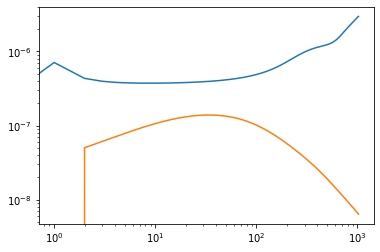

In [14]:
plt.loglog(ls,wls(ls)*G['ptt'][ls])
plt.loglog(ls,wls(ls)*poten['pp'][ls])

In [10]:
import camb

In [13]:
camb_ini = '/global/cscratch1/sd/lonappan/S4BIRD_old/CAMB/CAMB.ini'

In [31]:
pars = camb.read_ini(camb_ini)
pars.max_l = 1024
results = camb.get_results(pars)

In [20]:
n0 = wls(ls)*G['p'][ls]
clkk = wls(ls)*poten['pp'][ls]

In [58]:
clres = clkk*(1 - (clkk/(clkk+n0)))

/global/homes/l/lonappan/.conda/envs/PC2/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


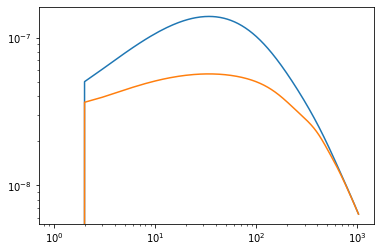

In [59]:
plt.loglog(clkk)
plt.loglog(clres)

In [60]:
delens = results.get_lensed_cls_with_spectrum(clres,lmax=1024,CMB_unit='muK' )

/global/homes/l/lonappan/.conda/envs/PC2/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


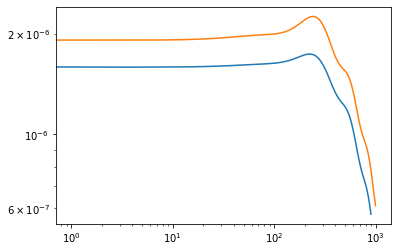

In [83]:
L = np.arange(0,901)
DL_factor = L*(L+1)/(2*np.pi)
plt.loglog((delens[:,2]/DL_factor)[2:1000])
plt.loglog(lensed['bb'][2:1000])